<a href="https://colab.research.google.com/github/Jacob-Bendele/Python-Coursework/blob/master/HW3DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jacob Bendele<br>
• Decision tree practice


##Setup

In [ ]:
# Allowing Colab to access my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Installing package for creating ID3 and C4.5 Trees
!pip install decision-tree-id3

In [ ]:
import pandas as pd
from sklearn import tree
import numpy as np
from id3 import Id3Estimator
from id3 import export_graphviz
from id3 import export_text


##Task 4: Create and Plot Decision Trees


###Different Implementations of the Football Data

In [ ]:
# Experimenting with pandas representations using dataframes
trainData = {"Home/Away": [1, 1, 0, 0, 1, 0], 
             "Opponent Top 25": [0, 1, 0, 0, 0, 0], 
             "Media": [1, 1, 2, 3, 1, 4], 
             "Label": [1, 0, 1, 1, 1, 1]}

testData = {"Home/Away": [1, 1, 1, 0, 1, 0], 
             "Opponent Top 25": [1, 0, 0, 1, 0, 1], 
             "Media": [1, 1, 1, 4, 1, 4], 
             "Label": [0, 0, 0, 0, 0, 0]}

labelData = {"LabelNames": ["Win", "Lose"]}

traindf = pd.DataFrame(trainData, columns = ["Home/Away", "Opponent Top 25", "Media", "Label"])
testdf = pd.DataFrame(testData, columns = ["Home/Away", "Opponent Top 25", "Media", "Label"])
labelNames = pd.DataFrame(labelData, columns = ["LabelNames"])

print(traindf)
print(testdf)
print(labelNames)

   Home/Away  Opponent Top 25  Media  Label
0          1                0      1      1
1          1                1      1      0
2          0                0      2      1
3          0                0      3      1
4          1                0      1      1
5          0                0      4      1
   Home/Away  Opponent Top 25  Media  Label
0          1                1      1      0
1          1                0      1      0
2          1                0      1      0
3          0                1      4      0
4          1                0      1      0
5          0                1      4      0
  LabelNames
0        Win
1       Lose


In [ ]:
# Experimenting w/ unencoded data
featureNames = ["Home/Away", "Opponent Top 25", "Media"]
data = np.array([["Home", "No", "NBC"],
                 ["Home", "Yes", "NBC"],
                 ["Away", "No", "ESPN"],
                 ["Away", "No", "FOX"],
                 ["Home", "No", "NBC"],
                 ["Away", "No" , "ABC"]])

label = np.array([["Win"],
                 ["Lose"],
                 ["Win"],
                 ["Win"],
                 ["Win"],
                 ["Win"]])

In [ ]:
# Used this encoded format
featureNames = ["Home/Away", "Opponent Top 25", "Media"]
data = np.array([[1, 0, 1],
                 [1, 1, 1],
                 [0, 0, 2],
                 [0, 0, 3],
                 [1, 0, 1],
                 [0, 0 , 4]])

label = np.array([1, 0, 1, 1, 1, 1])

###Question 1 ID3 Tree: Information Gain using Entropy

In [ ]:
# Create and fit
clf = Id3Estimator()
clf.fit(data, label, check_input=True)
export_graphviz(clf.tree_, "tree.dot", featureNames)
print(export_text(clf.tree_, featureNames))


Opponent Top 25 <=0.50: 1 (5) 
Opponent Top 25 >0.50: 0 (1) 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
!dot -Tpdf tree.dot -o tree.pdf
!cp tree.pdf "drive/My Drive/Machine Learning/"

![alt text](https://drive.google.com/uc?id=1CxhD18sKAAa_uNisI2gxcbtsOrYDHrA3)

###Question 1 C4.5 Tree: Information Gain Ratio using Entropy

In [ ]:
# Tells Id3 package to instead use gain ratio thus behaving like C4.5
clf = Id3Estimator(gain_ratio=True)
clf.fit(data, label, check_input=True)
export_graphviz(clf.tree_, "tree.dot", featureNames)
print(export_text(clf.tree_, featureNames))


Opponent Top 25 <=0.50: 1 (5) 
Opponent Top 25 >0.50: 0 (1) 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
!dot -Tpdf tree.dot -o tree1.pdf
!cp tree1.pdf "drive/My Drive/Machine Learning/"

![alt text](https://drive.google.com/uc?id=1CxhD18sKAAa_uNisI2gxcbtsOrYDHrA3)

###Question 1 CART Tree: Gini Index


[Text(167.4, 163.07999999999998, 'X[1] <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

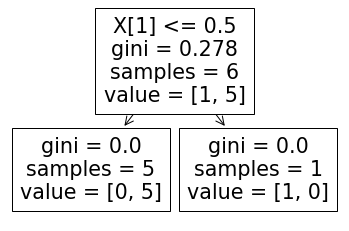

In [ ]:
# Builds tree using SKLearn tree classifier which is based on CART
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data, label)
tree.plot_tree(clf)

###Implementation of the Weather Data


In [ ]:
featureNames = ["Outlook", "Temperature", "Humidity", "Windy"]

data = np.array([[0, 0, 0, 0],
                 [0, 0, 0, 1],
                 [1, 0, 0, 0],
                 [2, 1, 0, 0],
                 [2, 2, 1, 0],
                 [2, 2, 1, 1],
                 [1, 2, 1, 1],
                 [0, 1, 0, 0],
                 [0, 2, 1, 0],
                 [2, 1, 1, 0],
                 [0, 1, 1, 1],
                 [1, 1, 0, 1],
                 [1, 0, 1, 0],
                 [2, 1, 0, 1]])

label = np.array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

###Question 2 ID3 Tree: Information Gain using Entropy

In [ ]:
# Create and fit
clf = Id3Estimator()
clf.fit(data, label, check_input=True)
export_graphviz(clf.tree_, "tree.dot", featureNames)
print(export_text(clf.tree_, featureNames))


Humidity <=0.50
|   Outlook <=0.50: 0 (3) 
|   Outlook >0.50
|   |   Windy <=0.50: 1 (2) 
|   |   Windy >0.50: 0 (1/1) 
Humidity >0.50
|   Outlook <=1.50: 1 (4) 
|   Outlook >1.50
|   |   Windy <=0.50: 1 (2) 
|   |   Windy >0.50: 0 (1) 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
!dot -Tpdf tree.dot -o tree2.pdf
!cp tree2.pdf "drive/My Drive/Machine Learning/"

![alt text](https://drive.google.com/uc?id=1PFCC49kM6VqtCLUqXD9yeBmBJ8dtmAh3)

###Question 2 C4.5 Tree: Information Gain using Entropy

In [ ]:
# Tells Id3 package to instead use gain ratio thus behaving like C4.5
clf = Id3Estimator(gain_ratio=True)
clf.fit(data, label, check_input=True)
export_graphviz(clf.tree_, "tree.dot", featureNames)
print(export_text(clf.tree_, featureNames))


Humidity <=0.50
|   Outlook <=0.50: 0 (3) 
|   Outlook >0.50
|   |   Windy <=0.50: 1 (2) 
|   |   Windy >0.50: 0 (1/1) 
Humidity >0.50
|   Outlook <=1.50: 1 (4) 
|   Outlook >1.50
|   |   Windy <=0.50: 1 (2) 
|   |   Windy >0.50: 0 (1) 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
!dot -Tpdf tree.dot -o tree3.pdf
!cp tree3.pdf "drive/My Drive/Machine Learning/"

![alt text](https://drive.google.com/uc?id=1PFCC49kM6VqtCLUqXD9yeBmBJ8dtmAh3)

###Question 2 CART Tree: Gini Index

[Text(148.8, 195.696, 'X[2] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(74.4, 152.208, 'X[0] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(37.2, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(111.60000000000001, 108.72, 'X[0] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(74.4, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(148.8, 65.232, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(186.0, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(223.20000000000002, 152.208, 'X[0] <= 1.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(186.0, 108.72, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(260.40000000000003, 108.72, 'X[3] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(223.20000000000002, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(297.6, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

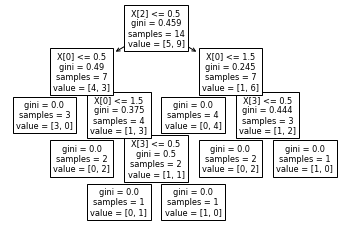

In [ ]:
# Builds tree using SKLearn tree classifier which is based on CART
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data, label)
tree.plot_tree(clf)

##Task 5: University Decision Tree Modeling

###Data


In [ ]:
featureNames = ["Home/Away", "Opponent Top 25", "Media"]

traindata = np.array([[0, 0, 0],
                 [1, 0, 3],
                 [0, 1, 0],
                 [0, 0, 0],
                 [1, 1, 3],
                 [0, 0, 0],
                 [0, 1, 0],
                 [1, 0, 3],
                 [1, 0, 3],
                 [0, 0, 0],
                 [1, 0, 0],
                 [1, 1, 2],
                 [1, 0, 3],
                 [0, 0, 0],
                 [0, 0, 0],
                 [0, 0, 0],
                 [0, 0, 1],
                 [1, 0, 3],
                 [0, 1, 0],
                 [0, 0, 0],
                 [0, 0, 4],
                 [0, 0, 0],
                 [0, 1, 0],
                 [1, 1, 3]])

trainlabel = np.array([1, 1, 1, 1, 0, 1, 1, 1, 1,  1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0])


testdata = np.array([[0, 0, 0],
                 [0, 1, 0],
                 [1, 0, 1],
                 [1, 0, 2],
                 [0, 0, 0],
                 [1, 0, 3],
                 [0, 1, 0],
                 [0, 0, 0],
                 [0, 0, 0],
                 [1, 1, 3],
                 [0, 0, 0],
                 [1, 1, 3]])

testlabel = np.array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0])

###Question 1: ID3 Implementation

In [ ]:
# Tells Id3 package to build tree
clf = Id3Estimator()
clf.fit(traindata, trainlabel, check_input=True)
export_graphviz(clf.tree_, "tree.dot", featureNames)
print(export_text(clf.tree_, featureNames))


Media <=1.50
|   Opponent Top 25 <=0.50
|   |   Home/Away <=0.50: 1 (8/2) 
|   |   Home/Away >0.50: 1 (1) 
|   Opponent Top 25 >0.50: 0 (2/2) 
Media >1.50
|   Opponent Top 25 <=0.50
|   |   Home/Away <=0.50: 0 (1) 
|   |   Home/Away >0.50: 1 (3/2) 
|   Opponent Top 25 >0.50: 0 (3) 



In [ ]:
!dot -Tpdf tree.dot -o ID3.pdf
!cp ID3.pdf "drive/My Drive/Machine Learning/"

![alt text](https://drive.google.com/uc?id=1AOYUt26fx0iro2_8aIuhb3GRCGNjdGsN)

####Predictions

In [ ]:
y = clf.predict(testdata)
print("Predictions ", y)
print("Test Labels ", testlabel)

Predictions  [1 0 1 1 1 1 0 1 1 0 1 0]
Test Labels  [1 0 1 1 1 1 1 1 1 0 1 0]


####Performance


In [ ]:
Accuracy = 11/12
Recall = 8 / (8 + 1)
Precision = 8 / (8 + 0)
F1 = 2 * (Precision * Recall) / (Precision + Recall)

print("Accuracy: ", Accuracy)
print("Recall: ", Recall)
print("Precision: ", Precision)
print("F1: ", F1)

Accuracy:  0.9166666666666666
Recall:  0.8888888888888888
Precision:  1.0
F1:  0.9411764705882353


###Question 2: C4.5 Implementation

In [ ]:
# Tells Id3 package to instead use gain ratio thus behaving like C4.5
clf = Id3Estimator(gain_ratio=True)
clf.fit(traindata, trainlabel, check_input=True)
export_graphviz(clf.tree_, "tree.dot", featureNames)
print(export_text(clf.tree_, featureNames))


Opponent Top 25 <=0.50
|   Media <=3.50
|   |   Home/Away <=0.50: 1 (8/2) 
|   |   Home/Away >0.50: 1 (4/2) 
|   Media >3.50: 0 (1) 
Opponent Top 25 >0.50
|   Home/Away <=0.50: 0 (2/2) 
|   Home/Away >0.50: 0 (3) 



In [ ]:
!dot -Tpdf tree.dot -o C45.pdf
!cp C45.pdf "drive/My Drive/Machine Learning/"

![alt text](https://drive.google.com/uc?id=1uAN_ry1gvJDRLbpLfOyJez6KJxr6L4ha)

####Predictions

In [ ]:
y = clf.predict(testdata)
print("Predictions ", y)
print("Test Labels ", testlabel)

Predictions  [1 0 1 1 1 1 0 1 1 0 1 0]
Test Labels  [1 0 1 1 1 1 1 1 1 0 1 0]


####Performance

In [ ]:
Accuracy = 11/12
Recall = 8 / (8 + 1)
Precision = 8 / (8 + 0)
F1 = 2 * (Precision * Recall) / (Precision + Recall)

print("Accuracy: ", Accuracy)
print("Recall: ", Recall)
print("Precision: ", Precision)
print("F1: ", F1)

Accuracy:  0.9166666666666666
Recall:  0.8888888888888888
Precision:  1.0
F1:  0.9411764705882353
